In [1]:
import pandas as pd

pd.set_option('display.max_columns', 100)

df_mod = pd.read_parquet('../../data/model_data/model_data_single_output.parquet')

df_mod = df_mod.loc[df_mod['Position'] == 'WR', :].reset_index(drop=True)

df_mod

,Season,Week,Name,Position,Team,Fantasy Points,Rank,Position Rank,Adjusted Passing Yards Projection,Adjusted Passing Touchdowns Projection,Adjusted Interceptions Projection,Adjusted Rushing Yards Projection,Adjusted Receiving Yards Projection,Adjusted Receptions Projection,Anytime Touchdown Probability,Location,Team Projected Score,Opponent Projected Score
0,2020,1,michael thomas,WR,NO,3.2,21.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,26.25,22.25
1,2020,1,davante adams,WR,GB,34.6,33.0,2,NaN,NaN,NaN,NaN,87.500000,7.466125,0.476190,-1.0,21.50,23.00
2,2020,1,julio jones,WR,ATL,20.2,36.0,3,NaN,NaN,NaN,NaN,92.500000,6.544513,0.476190,1.0,NaN,NaN
3,2020,1,tyreek hill,WR,KC,13.1,37.0,4,NaN,NaN,NaN,NaN,74.500000,5.442461,0.565217,1.0,31.50,22.00
4,2020,1,chris godwin,WR,TB,10.9,45.0,5,NaN,NaN,NaN,NaN,70.500000,5.548948,0.444444,-1.0,22.25,26.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6040,2023,17,equanimeous st,WR,CHI,0.0,266.0,110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,20.75,18.25
6041,2023,17,van jefferson,WR,ATL,3.4,270.0,112,NaN,NaN,NaN,NaN,11.488149,1.339031,0.125000,-1.0,18.25,20.75
6042,2023,17,julio jones,WR,PHI,16.4,272.0,113,NaN,NaN,NaN,NaN,8.500000,1.343000,0.100000,1.0,30.25,17.75
6043,2023,17,khadarel hodge,WR,ATL,0.0,297.0,119,NaN,NaN,NaN,NaN,8.500000,0.640297,0.083333,-1.0,18.25,20.75


In [2]:
X = df_mod[[
    'Rank',
    'Position Rank',
    'Location',
    'Team Projected Score',
    'Opponent Projected Score',
    'Adjusted Receptions Projection',
    'Adjusted Receiving Yards Projection',
    'Adjusted Rushing Yards Projection',
    'Anytime Touchdown Probability',
]].copy()

X

,Rank,Position Rank,Location,Team Projected Score,Opponent Projected Score,Adjusted Receptions Projection,Adjusted Receiving Yards Projection,Adjusted Rushing Yards Projection,Anytime Touchdown Probability
0,21.0,1,1.0,26.25,22.25,NaN,NaN,NaN,NaN
1,33.0,2,-1.0,21.50,23.00,7.466125,87.500000,NaN,0.476190
2,36.0,3,1.0,NaN,NaN,6.544513,92.500000,NaN,0.476190
3,37.0,4,1.0,31.50,22.00,5.442461,74.500000,NaN,0.565217
4,45.0,5,-1.0,22.25,26.25,5.548948,70.500000,NaN,0.444444
...,...,...,...,...,...,...,...,...,...
6040,266.0,110,1.0,20.75,18.25,NaN,NaN,NaN,NaN
6041,270.0,112,-1.0,18.25,20.75,1.339031,11.488149,NaN,0.125000
6042,272.0,113,1.0,30.25,17.75,1.343000,8.500000,NaN,0.100000
6043,297.0,119,-1.0,18.25,20.75,0.640297,8.500000,NaN,0.083333


In [3]:
y = df_mod['Fantasy Points'].copy()

y

0        3.2
1       34.6
2       20.2
3       13.1
4       10.9
        ... 
6040     0.0
6041     3.4
6042    16.4
6043     0.0
6044     0.0
Name: Fantasy Points, Length: 6045, dtype: float64

In [4]:
groups = df_mod['Season'].astype(str) + ' Week ' + df_mod['Week'].astype(str)

groups

0        2020 Week 1
1        2020 Week 1
2        2020 Week 1
3        2020 Week 1
4        2020 Week 1
            ...     
6040    2023 Week 17
6041    2023 Week 17
6042    2023 Week 17
6043    2023 Week 17
6044    2023 Week 17
Length: 6045, dtype: object

In [5]:
df_folds = pd.read_parquet('../../data/model_data/folds.parquet')

df_folds

,Fold ID,Season Week
0,0,2022 Week 3
1,0,2021 Week 7
2,0,2021 Week 1
3,0,2023 Week 16
4,0,2021 Week 11
...,...,...
62,2,2020 Week 15
63,2,2023 Week 14
64,2,2021 Week 5
65,2,2022 Week 6


In [6]:
from sklearn.model_selection import GroupShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

pd.options.mode.chained_assignment = None

# splitter = GroupKFold(n_splits=3)

cv_data = []
# for is_indexes, oos_indexes in splitter.split(X=X, y=y, groups=groups):
for fold in df_folds['Fold ID'].unique():
    oos_season_week = df_folds.loc[df_folds['Fold ID'] == fold, 'Season Week']
    is_indexes = df_mod.loc[~groups.isin(oos_season_week), :].index
    oos_indexes = df_mod.loc[groups.isin(oos_season_week), :].index
    # split
    X_is = X.iloc[is_indexes]
    X_oos = X.iloc[oos_indexes]

    y_is = y.iloc[is_indexes]
    y_oos = y.iloc[oos_indexes]

    groups_is = groups.iloc[is_indexes]
    df_mod_oos = df_mod.iloc[oos_indexes]

    gss = GroupShuffleSplit(n_splits=1, test_size=0.15, random_state=22)
    for train_indexes, val_indexes in gss.split(X=X_is, y=y_is, groups=groups_is):
        X_train = X_is.iloc[train_indexes]
        X_val = X_is.iloc[val_indexes]

        y_train = y_is.iloc[train_indexes]
        y_val = y_is.iloc[val_indexes]

    # impute
    scaler = StandardScaler()
    imputer = IterativeImputer(initial_strategy='median', max_iter=100)

    X_train_fill_na = imputer.fit_transform(scaler.fit_transform(X_train))
    X_train[X_train.columns] = scaler.inverse_transform(X_train_fill_na).copy()
    X_train['Prop Bets Projection'] = (
        X_train['Adjusted Receiving Yards Projection']*0.1 + 
        X_train['Adjusted Receptions Projection']*0.5 + 
        X_train['Adjusted Rushing Yards Projection']*0.1 +
        X_train['Anytime Touchdown Probability']*6
    )

    X_val_fill_na = imputer.transform(scaler.transform(X_val))
    X_val[X_val.columns] = scaler.inverse_transform(X_val_fill_na).copy()
    X_val['Prop Bets Projection'] = (
        X_val['Adjusted Receiving Yards Projection']*0.1 + 
        X_val['Adjusted Receptions Projection']*0.5 + 
        X_val['Adjusted Rushing Yards Projection']*0.1 +
        X_val['Anytime Touchdown Probability']*6
    )

    X_oos_fill_na = imputer.transform(scaler.transform(X_oos))
    X_oos[X_oos.columns] = scaler.inverse_transform(X_oos_fill_na).copy()
    X_oos['Prop Bets Projection'] = (
        X_oos['Adjusted Receiving Yards Projection']*0.1 + 
        X_oos['Adjusted Receptions Projection']*0.5 + 
        X_oos['Adjusted Rushing Yards Projection']*0.1 +
        X_oos['Anytime Touchdown Probability']*6
    )

    X_train.drop(columns=['Adjusted Receiving Yards Projection', 'Adjusted Receptions Projection', 'Adjusted Rushing Yards Projection', 'Anytime Touchdown Probability'], inplace=True)
    X_val.drop(columns=['Adjusted Receiving Yards Projection', 'Adjusted Receptions Projection', 'Adjusted Rushing Yards Projection', 'Anytime Touchdown Probability'], inplace=True)
    X_oos.drop(columns=['Adjusted Receiving Yards Projection', 'Adjusted Receptions Projection', 'Adjusted Rushing Yards Projection', 'Anytime Touchdown Probability'], inplace=True)

    cv_data.append((X_train, X_val, X_oos, y_train, y_val, y_oos, df_mod_oos))

for X_train, X_val, X_oos, y_train, y_val, y_oos, df_mod_oos in cv_data:
    print(X_train.shape, X_val.shape, X_oos.shape, y_train.shape, y_val.shape, y_oos.shape, df_mod_oos.shape)

c:\Users\mhugh\anaconda3\envs\clean\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


(3316, 6) (648, 6) (2081, 6) (3316,) (648,) (2081,) (2081, 18)
(3466, 6) (636, 6) (1943, 6) (3466,) (636,) (1943,) (1943, 18)
(3412, 6) (612, 6) (2021, 6) (3412,) (612,) (2021,) (2021, 18)


In [7]:
monotonic_contraints_dict = {
    'Rank': -1,
    'Position Rank': -1,
    'Location': 1,
    'Team Projected Score': 1,
    'Adjusted Receiving Yards Projection': 1,
    'Adjusted Receptions Projection': 1,
    'Adjusted Rushing Yards Projection': 1,
    'Anytime Touchdown Probability': 1,
    'Prop Bets Projection': 1,
}

monotone_contraints = [monotonic_contraints_dict.get(c, 0) for c in X_train.columns]

monotone_contraints

[-1, -1, 1, 1, 0, 1]

In [8]:
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
import optuna
import numpy as np

def objective(trial, cv_data=cv_data):
    # model tuning
    # params = {
    #     'random_state': 22,
    #     'objective': 'binary:logistic',
    #     'eval_metric': 'logloss',
    #     'n_estimators': 1_000,
    #     'eta': trial.suggest_float('eta', 0.005, 0.100),
    #     'max_depth': trial.suggest_int('max_depth', 4, 16),
    #     'lambda': trial.suggest_float('lambda', 1e-8, 5.0),
    #     'alpha': trial.suggest_float('alpha', 1e-8, 5.0),
    #     'min_child_weight': trial.suggest_float('min_child_weight', 1e-8, 5.0),
    #     # 'subsample': trial.suggest_float('subsample', 0.5, 1.0),
    #     'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 0.30),
    # }
    params = {
        'random_state': 22,
        'metric': 'mean_squared_error',
        'verbosity': -1,
        'n_estimators': 500,
        'early_stopping_round': 25,
        'monotone_constraints': monotone_contraints,
        'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0),
        'max_depth': trial.suggest_int('max_depth', 1, 32),
        'num_leaves': trial.suggest_int('num_leaves', 2, 2**8),
        'feature_fraction': trial.suggest_float('feature_fraction', 1e-8, 1.0),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 100),
    }
    mod = LGBMRegressor(**params)

    # cross validation
    y_actuals = []
    y_preds = []
    for X_train, X_val, X_test, y_train, y_val, y_test, df_mod_oos in cv_data:
        y_actuals.append(y_test)

        mod.fit(
            X_train, 
            y_train, 
            eval_set=(X_val, y_val),
        )

        y_preds.append(mod.predict(X_test))

    return mean_squared_error(np.hstack(y_actuals), np.hstack(y_preds), squared=False)

study = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler(seed=22, n_startup_trials=50, multivariate=True))
study.optimize(objective, n_trials=500, show_progress_bar=True)

study.best_params

c:\Users\mhugh\anaconda3\envs\clean\lib\site-packages\optuna\samplers\_tpe\sampler.py:295: ExperimentalWarning: ``multivariate`` option is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2024-10-16 21:25:41,507] A new study created in memory with name: no-name-36086d57-2f4b-434d-ae3f-afe86aa7a394


  0%|          | 0/500 [00:00<?, ?it/s]

[I 2024-10-16 21:25:41,871] Trial 0 finished with value: 6.168220966343431 and parameters: {'lambda_l1': 2.084605381503821, 'lambda_l2': 4.816810622816848, 'max_depth': 14, 'num_leaves': 221, 'feature_fraction': 0.17116156190005774, 'min_child_samples': 34}. Best is trial 0 with value: 6.168220966343431.
[I 2024-10-16 21:25:42,038] Trial 1 finished with value: 6.168186654816475 and parameters: {'lambda_l1': 2.7053283402729833, 'lambda_l2': 6.910413507585547, 'max_depth': 8, 'num_leaves': 209, 'feature_fraction': 0.010526884210839693, 'min_child_samples': 57}. Best is trial 1 with value: 6.168186654816475.
[I 2024-10-16 21:25:42,117] Trial 2 finished with value: 6.157101142095366 and parameters: {'lambda_l1': 8.137261876014703, 'lambda_l2': 7.451002963137353, 'max_depth': 7, 'num_leaves': 3, 'feature_fraction': 0.7720438737240976, 'min_child_samples': 96}. Best is trial 2 with value: 6.157101142095366.
[I 2024-10-16 21:25:42,238] Trial 3 finished with value: 6.1619757229240255 and param

{'lambda_l1': 9.635800688979389,
 'lambda_l2': 8.845774722612166,
 'max_depth': 1,
 'num_leaves': 26,
 'feature_fraction': 0.34152021311607944,
 'min_child_samples': 92}

6.13887983517926

In [9]:
params = (
    {
        'random_state': 22,
        'metric': 'mean_squared_error',
        'verbosity': -1,
        'n_estimators': 500,
        'early_stopping_round': 25,
        'monotone_constraints': monotone_contraints,
    } |
    study.best_params
)

testing_data = []
mod = LGBMRegressor(**params)
for X_train, X_val, X_test, y_train, y_val, y_test, df_mod_oos in cv_data:
    mod.fit(
        X_train, 
        y_train, 
        eval_set=(X_val, y_val),
    )
    
    testing_data.append(df_mod_oos.assign(Prediction=mod.predict(X_test)))

df_test = pd.concat(testing_data, ignore_index=True)

df_test

,Season,Week,Name,Position,Team,Fantasy Points,Rank,Position Rank,Adjusted Passing Yards Projection,Adjusted Passing Touchdowns Projection,Adjusted Interceptions Projection,Adjusted Rushing Yards Projection,Adjusted Receiving Yards Projection,Adjusted Receptions Projection,Anytime Touchdown Probability,Location,Team Projected Score,Opponent Projected Score,Prediction
0,2020,5,deandre hopkins,WR,ARI,22.1,27.0,1,NaN,NaN,NaN,NaN,75.500000,7.449495,0.500000,-1.0,27.75,20.75,15.592487
1,2020,5,tyreek hill,WR,KC,16.8,29.0,2,NaN,NaN,NaN,NaN,67.500000,5.453986,0.579832,1.0,32.50,22.00,15.991712
2,2020,5,adam thielen,WR,MIN,24.8,36.0,3,NaN,NaN,NaN,NaN,80.505537,5.515873,0.500000,-1.0,23.50,30.00,15.901198
3,2020,5,dk metcalf,WR,SEA,24.3,39.0,4,NaN,NaN,NaN,NaN,72.535408,4.545417,0.545455,1.0,30.00,23.50,15.010605
4,2020,5,calvin ridley,WR,ATL,17.6,40.0,5,NaN,NaN,NaN,NaN,78.500000,5.579462,0.500000,1.0,27.75,25.25,14.912697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6040,2023,17,equanimeous st,WR,CHI,0.0,266.0,110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,20.75,18.25,3.686587
6041,2023,17,van jefferson,WR,ATL,3.4,270.0,112,NaN,NaN,NaN,NaN,11.488149,1.339031,0.125000,-1.0,18.25,20.75,3.179040
6042,2023,17,julio jones,WR,PHI,16.4,272.0,113,NaN,NaN,NaN,NaN,8.500000,1.343000,0.100000,1.0,30.25,17.75,4.054706
6043,2023,17,khadarel hodge,WR,ATL,0.0,297.0,119,NaN,NaN,NaN,NaN,8.500000,0.640297,0.083333,-1.0,18.25,20.75,3.179040


In [10]:
df_test['Prediction'].describe()

count    6045.000000
mean        8.275046
std         3.432946
min         2.381229
25%         5.575653
50%         7.621252
75%        10.905089
max        17.605833
Name: Prediction, dtype: float64

In [11]:
(df_test['Fantasy Points'] - df_test['Prediction']).describe()

count    6045.000000
mean       -0.028280
std         6.149921
min       -16.838783
25%        -4.185613
50%        -1.380524
75%         3.281654
max        37.155949
dtype: float64

In [12]:
(df_test['Fantasy Points'] - df_test['Prediction']).abs().describe()

count    6045.000000
mean        4.755586
std         3.899102
min         0.000974
25%         2.040082
50%         3.937239
75%         6.361003
max        37.155949
dtype: float64

In [13]:
from sklearn.metrics import mean_squared_error

mean_squared_error(df_test['Fantasy Points'], df_test['Prediction'], squared=False)

6.14947762827551

In [14]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(df_test['Fantasy Points'], df_test['Prediction'])

4.755585637688074

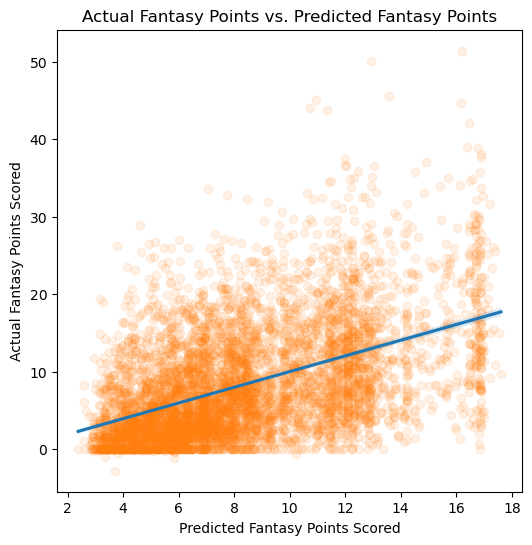

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6), dpi=100)

ax = sns.regplot(
    data=df_test,
    x='Prediction',
    y='Fantasy Points',
    scatter_kws={'alpha': 0.10, 'color': sns.color_palette()[1]},
    line_kws={'color': sns.color_palette()[0]},
)

plt.title('Actual Fantasy Points vs. Predicted Fantasy Points')
plt.xlabel('Predicted Fantasy Points Scored')
plt.ylabel('Actual Fantasy Points Scored')

plt.show()

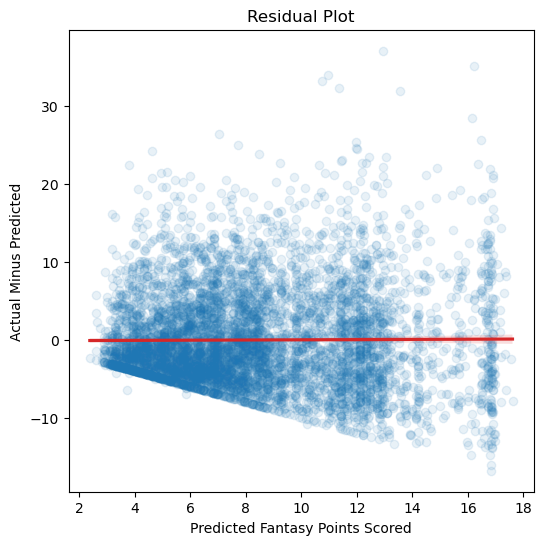

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6), dpi=100)

ax = sns.regplot(
    data=df_test.assign(f=(df_test['Fantasy Points'] - df_test['Prediction'])),
    x='Prediction',
    y='f',
    scatter_kws={'alpha': 0.10, 'color': sns.color_palette()[0]},
    line_kws={'color': sns.color_palette()[3]},
)

plt.title('Residual Plot')
plt.xlabel('Predicted Fantasy Points Scored')
plt.ylabel('Actual Minus Predicted')

plt.show()

In [17]:
import shap

explainer = shap.Explainer(mod, feature_names=X_train.columns, seed=22)

shap_values = explainer(pd.concat([i[0] for i in cv_data], ignore_index=True))

shap_values.shape

(10194, 6)

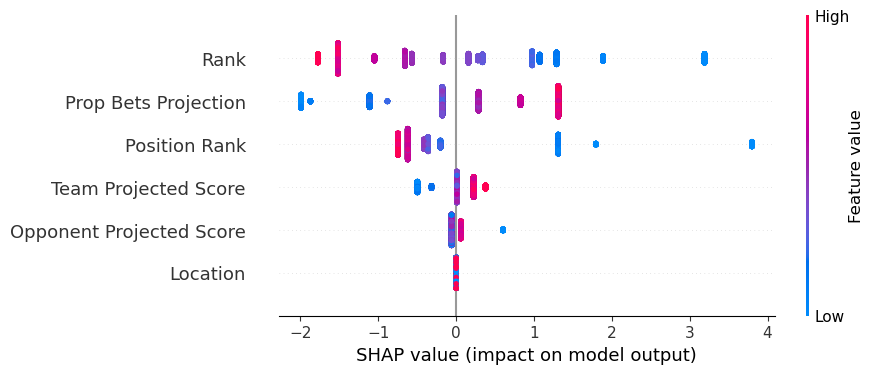

In [18]:
shap.plots.beeswarm(shap_values, max_display=None)